# Kaggle House Prices

This competition: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/

It is old, and the leaderboard is saturated with perfect submissions. But it looks like great classic ML practice, and I can take inspiration from another submission: https://github.com/sushant2811/KaggleHousingPrices

## Notes/planning

Outline
- Load data sets and explore the known data for imputation methods and correlations
- Train/test split on the known data, and (4-fold?) cross validation splits on the train data
- Apply the imputation and variable cleaning pipeline, avoiding data leakage

In parts

Explore
- Visualize the distributions of some features, especially the target; think about transformations
- Check variables correlations

Clean variables
- Convert things to ordinals
- Drop variables with lots of NaN entries, or that rarely take informative values
- Impute (smartly) missing variables, using correlated variables to help
- Drop highly correlated variables
- Remove outliers

Prep ML
- Consider custom features
- Scale variables to be approximately normal
- One-hot or LabelEncoder

ML
- Linear regression, random forests and boosting
- Visualize the predictions
- Check which variables were most important

### Variables
Last step: standardize everything, for regularized linear regression

How do Qual vs Cond compare?

## Scratchwork

In [77]:
# Autoreload so we don't have to reimport packages when we change them
%load_ext autoreload
%autoreload 2

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import houseprice as hp

In [137]:
# I'll avoid the names train/test for now, since later on I'll do a train/test split on the known data
data = pd.read_csv('../data/train.csv')
pred = pd.read_csv('../data/test.csv')

In [138]:
# Run once to convert to ordinals in place
hp.ordinals(data)

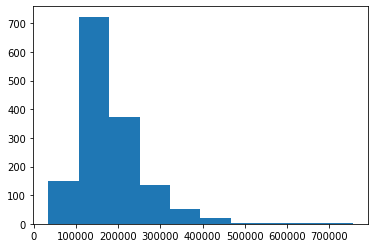

In [120]:
plt.hist(data['SalePrice'])
plt.show()

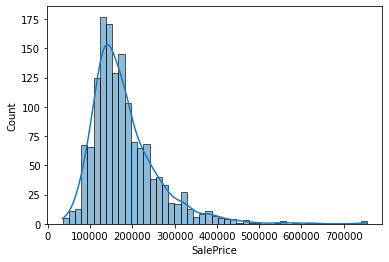

In [23]:
sns.histplot(data['SalePrice'], kde=True)
plt.show()

In [139]:
corrmat = data.corr()

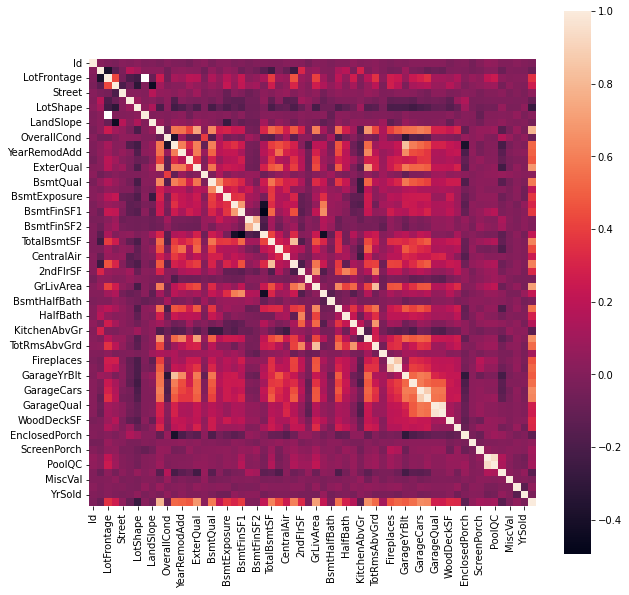

In [140]:
plt.figure(figsize=(10,10))
sns.heatmap(corrmat, square = True)
plt.show()

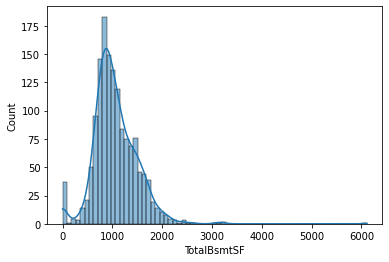

In [38]:
sns.histplot(data['TotalBsmtSF'], kde=True)
plt.show()

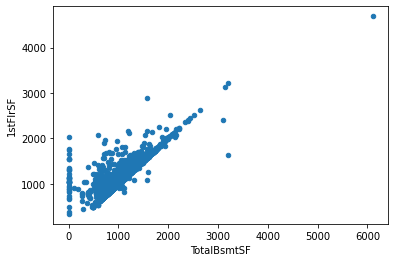

In [45]:
data.plot.scatter(x='TotalBsmtSF', y='1stFlrSF')
plt.show()

In [147]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,1.995890,0.090411,3.591781,3.998630,2.937671,6.099315,...,21.954110,3.409589,15.060959,2.758904,0.017808,0.565753,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,0.063996,0.372151,0.582296,0.052342,0.276232,1.382997,...,61.119149,29.317331,55.757415,40.177307,0.268952,1.204483,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,2.000000,0.000000,3.000000,4.000000,3.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,2.000000,0.000000,4.000000,4.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,2.000000,0.000000,4.000000,4.000000,3.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,2.000000,2.000000,4.000000,4.000000,3.000000,10.000000,...,552.000000,508.000000,480.000000,738.000000,5.000000,4.000000,15500.000000,12.000000,2010.000000,755000.000000


Next step: drop variables that take mostly just 1 value, and ones that are too correlated

Do whatever to get a reasonable dataset, then do ML

Know how to do CV with sklearn and by hand; how to fit and use standard scalars; how to tweak random forest parameters; etc